In [93]:
# reading all the names from the file
words = open("names.txt", "r").read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [94]:
num_names = len(words)
minimum_word_l = min(len(w) for w in words)
maximum_word_l = max(len(w) for w in words)
num_names, minimum_word_l, maximum_word_l

(32033, 2, 15)

In [95]:
# Bigram Language Model
# This involves working with only two characters at a time
# Only looking at a previous characters to predict the next word

In [96]:
bigrams = dict()
b_tuples = dict()
unique_tokens = set()


for w in words:
    all_word_bigrams = []
    start_bigram = ('<start>', w[0])
    all_word_bigrams.append(start_bigram)
    b_tuples[start_bigram] = b_tuples.get(start_bigram, 0) + 1
    
    for i in range(len(w) - 1):
        bigram = (w[i], w[i+1])
        unique_tokens.add(w[i])
        unique_tokens.add(w[i+1])
        b_tuples[bigram] = b_tuples.get(bigram, 0) + 1
        all_word_bigrams.append(bigram)
    stop_bigram = (w[-1], '<stop>')
    all_word_bigrams.append(stop_bigram)
    b_tuples[stop_bigram] = b_tuples.get(stop_bigram, 0) + 1
    bigrams[w] = all_word_bigrams

In [97]:
bigrams["isabella"]

[('<start>', 'i'),
 ('i', 's'),
 ('s', 'a'),
 ('a', 'b'),
 ('b', 'e'),
 ('e', 'l'),
 ('l', 'l'),
 ('l', 'a'),
 ('a', '<stop>')]

In [98]:
word_preceed_dictionary = dict()

for _, value in bigrams.items():
    for first, second in value:
        if first not in word_preceed_dictionary:
            word_preceed_dictionary[first] = dict()
        if second not in word_preceed_dictionary[first]:
            word_preceed_dictionary[first][second] = 1
        else:
            word_preceed_dictionary[first][second] += 1
            

In [99]:
word_preceed_dictionary['i']

{'v': 250,
 'a': 2335,
 's': 1212,
 'g': 399,
 'l': 1272,
 'z': 269,
 'c': 476,
 'e': 1537,
 'o': 561,
 'r': 813,
 'n': 1946,
 '<stop>': 2218,
 'y': 757,
 't': 516,
 'p': 49,
 'm': 400,
 'd': 406,
 'f': 94,
 'x': 71,
 'k': 425,
 'b': 109,
 'u': 108,
 'q': 48,
 'j': 73,
 'h': 92,
 'i': 79,
 'w': 8}

In [100]:
unique_tokens = list(sorted(unique_tokens))
unique_tokens.append('<start>')
unique_tokens.append('<stop>')
unique_tokens


['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '<start>',
 '<stop>']

In [101]:
sorted(b_tuples.items(), key=lambda kv: -kv[1])

[(('n', '<stop>'), 6763),
 (('a', '<stop>'), 6640),
 (('a', 'n'), 5438),
 (('<start>', 'a'), 4410),
 (('e', '<stop>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<start>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<start>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<stop>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<start>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<stop>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<start>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<stop>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<start>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<start>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<start>', 'l'), 1572),
 (('<start>', 'c'),

In [102]:
import torch
data = torch.zeros((len(unique_tokens), len(unique_tokens)), dtype=torch.int32)


In [103]:
for k, v in word_preceed_dictionary.items():
    for character, count in v.items():
        data[unique_tokens.index(k), unique_tokens.index(character)] = data[unique_tokens.index(k), unique_tokens.index(character)] + count


In [104]:
data

tensor([[ 544,  525,  422,  974,  646,  130,  152, 2240, 1541,  166,  520, 2417,
         1506, 5093,   60,   77,   58, 3009, 1045,  653,  354,  786,  151,  164,
         1894,  400,    0, 6474],
        [ 302,   35,    1,   65,  624,    0,    0,   40,  197,    1,    0,   83,
            0,    4,   90,    0,    0,  748,    8,    2,   43,    0,    0,    0,
           64,    0,    0,  110],
        [ 733,    0,   37,    1,  491,    0,    2,  600,  263,    3,  286,  106,
            0,    0,  334,    1,   11,   69,    5,   32,   33,    0,    0,    3,
           86,    4,    0,   92],
        [1220,    1,    3,  137, 1164,    5,   23,  116,  621,    9,    3,   49,
           29,   27,  358,    0,    1,  403,   24,    4,   90,   17,   22,    0,
          265,    1,    0,  487],
        [ 650,  116,  137,  361, 1195,   80,  104,  142,  792,   55,  174, 3073,
          710, 2402,  253,   76,   13, 1761,  784,  560,   68,  424,   43,  120,
          937,  170,    0, 3641],
        [ 235,    0,

In [105]:
data.shape

torch.Size([28, 28])

In [106]:
N = torch.zeros((27, 27), dtype=torch.int32)
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0

stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [109]:
itos = {i:s for s, i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [110]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

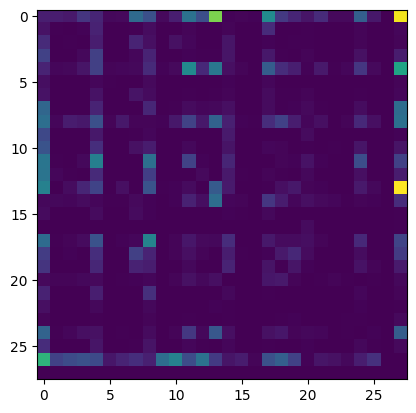

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(N)

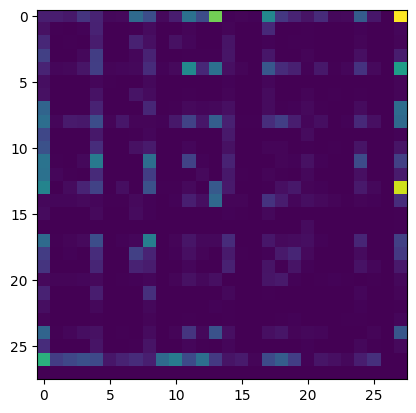

In [ ]:
plt.imshow(data)

In [111]:
def cleanplot(data):
    plt.figure(figsize=(16, 16))
    plt.imshow(data, cmap="Blues")
    for i in range(27):
        for j in range(27):
            chstr = itos[i] + itos[j]
            plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
            plt.text(j, i, data[i, j].item(), ha="center", va="top", color="gray")
    plt.axis("off")
    

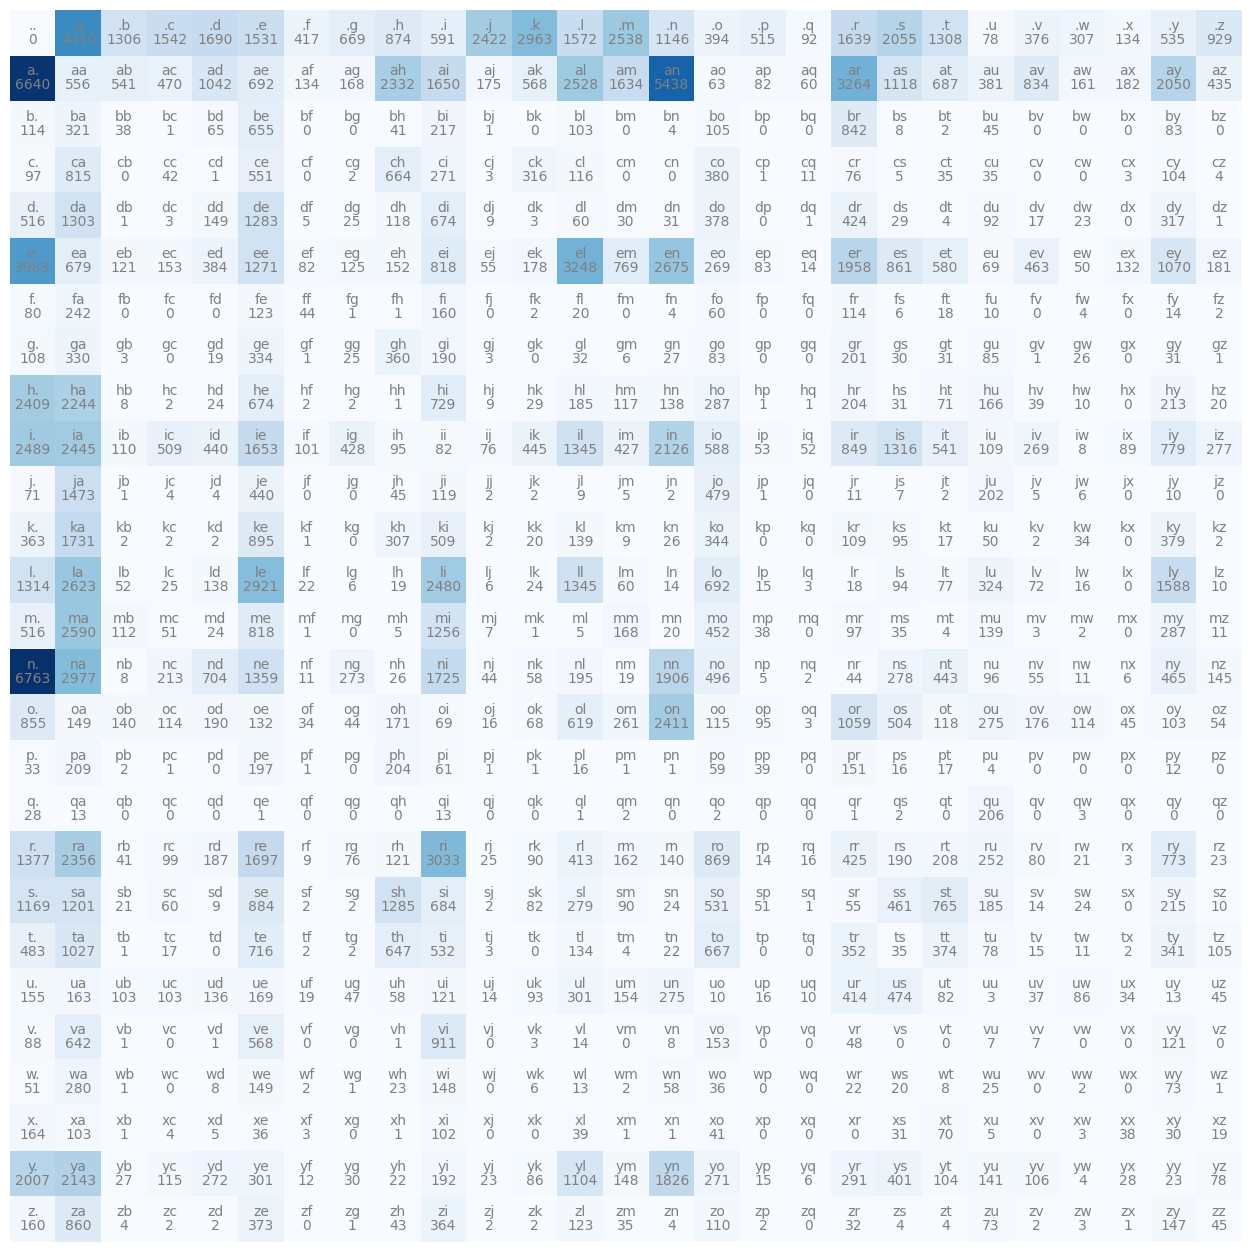

In [112]:
cleanplot(N)

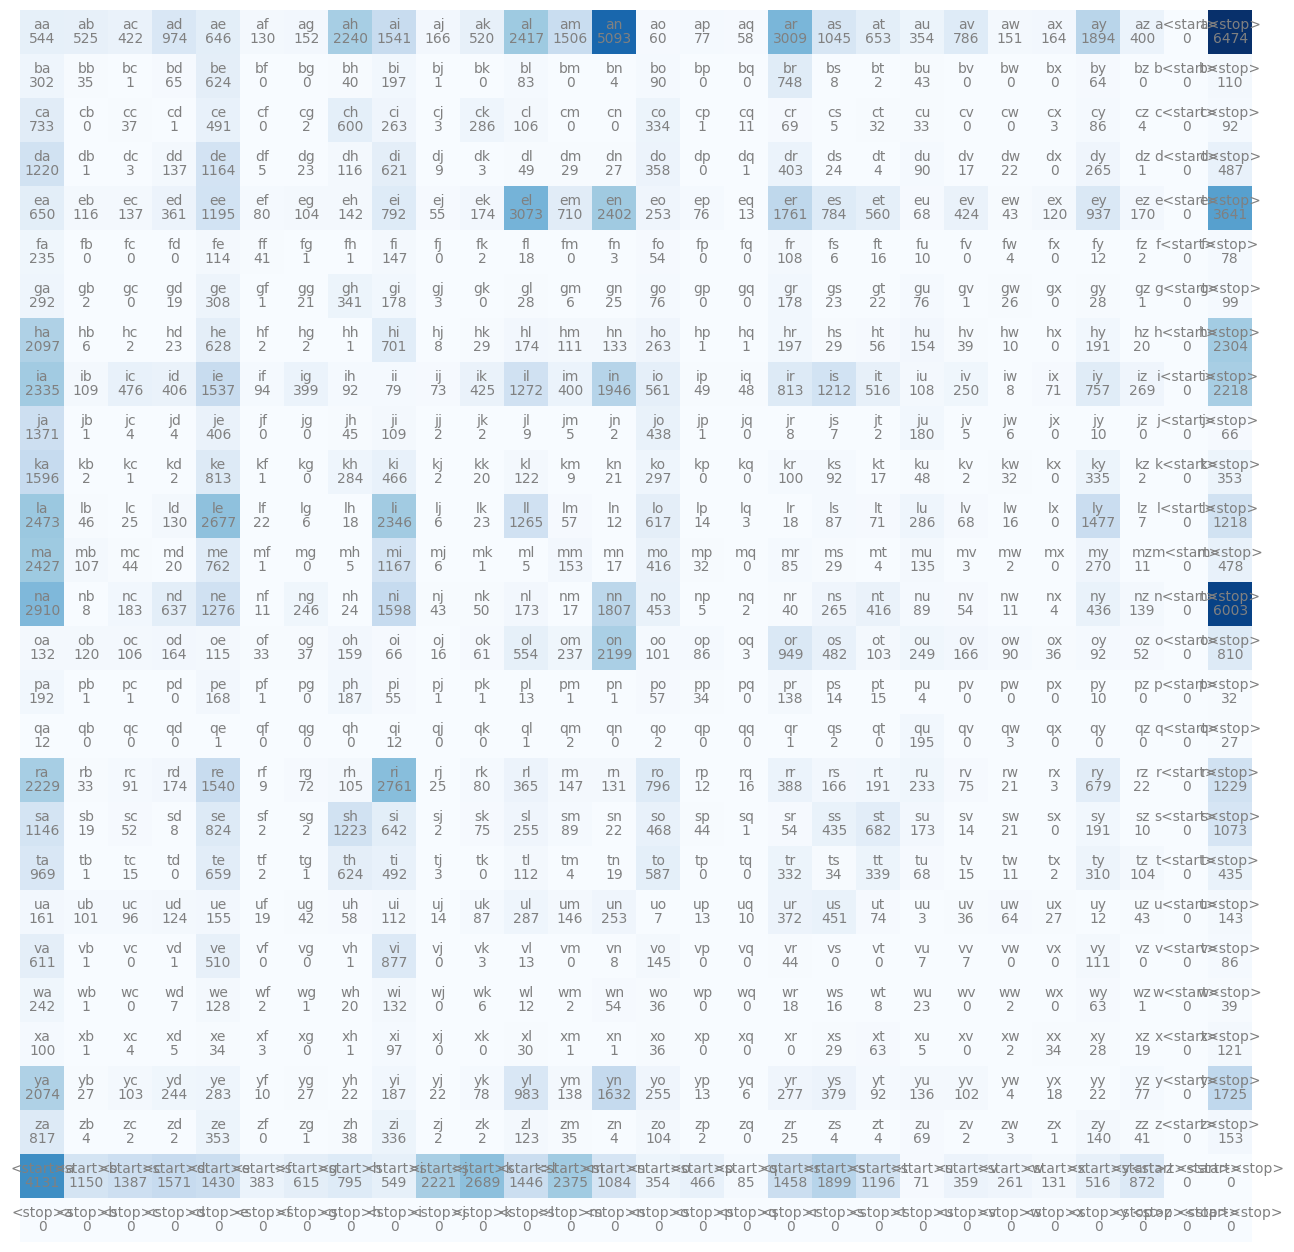

In [88]:
cleanplot(data)

In [136]:
import numpy as np
g = torch.Generator().manual_seed(2147483647)

In [185]:
def normalize_data(data):
    sums = torch.sum(data, dim=1)
    sums = torch.reshape(sums, shape=(27, 1))
    data = data / sums
    return data

In [145]:
def get_probability_distribution(slice):
    s = slice.sum()
    p = slice / s
    return p

In [186]:
P = normalize_data(N)
P[0].sum(), N[0].sum()

(tensor(1.), tensor(32033))

In [187]:
def generate_sequence(map):
    data = normalize_data(map)
    probabilities = data[0]
    output = ""
    while True:
        idx = torch.multinomial(probabilities, num_samples=1, 
                                replacement=True, generator=g).item()
        output += itos[idx]
        probabilities = data[idx]
        if itos[idx] == '.':
            break
    return output[:-1]
        

In [211]:
generate_sequence(N)

'rana'

In [ ]:
# Evaluate the quality of the model. This would be the loss of our model
# Likelihood is the product of all the probabilities
# We would adjust the parameters of the model using a neural network

In [227]:
def calculate_loss(params, words):
    avg_neg_loss_likelihood = 0
    count = 0
    
    for word in words:
        word = ['.'] + list(word) + ['.']
        for ch1, ch2 in zip(word, word[1:]):
            prob = params[stoi[ch1], stoi[ch2]]
            nlog_prob = - torch.log(prob + 1e-4)
            avg_neg_loss_likelihood += nlog_prob 
            count += 1
            
    return avg_neg_loss_likelihood / count

In [228]:
calculate_loss(P, words)

tensor(2.4517)

In [231]:
# create the training set for all the bigrams
def generate_dataset(words):
    xs, ys = [], []
    for w in words:
        chs = ['.'] + list(w) + ['.']
        for ch1, ch2 in zip(chs, chs[1:]):
            xs.append(stoi[ch1])
            ys.append(stoi[ch2])
    return torch.tensor(xs), torch.tensor(ys)

In [245]:
xs, ys = generate_dataset(words)
len(xs)

228146

In [246]:
import torch.nn.functional as F

xs = F.one_hot(xs, num_classes=27).float()
ys = F.one_hot(ys, num_classes=27).float()


In [247]:
xs.shape

torch.Size([228146, 27])

In [271]:
w = torch.randn((27, 27), requires_grad=True)

In [289]:
# forward pass
logits = xs @ w
counts = logits.exp()
probs = counts / counts.sum(1, keepdims = True)

In [290]:
# calculate loss
results = torch.mul(probs, ys).sum(dim=1)
neg_logs = -torch.log(results)
loss = neg_logs.mean()
loss

tensor(3.8727, grad_fn=<MeanBackward0>)

In [291]:
# backward pass
w.grad = None
loss.backward()

In [292]:
w.data += -0.1 * w.grad

In [ ]:
class BigramModel:
    pass

In [304]:
def train(xs, ys, w, iterations = 100):
    for i in range(iterations):
        # forward pass
        logits = xs @ w
        counts = logits.exp()
        probs = counts / counts.sum(1, keepdims = True)
        
        # calculate loss
        results = torch.mul(probs, ys).sum(dim=1)
        neg_logs = -torch.log(results)
        loss = neg_logs.mean() + (w**2).mean()
        print(f"The loss at {i} is : ", loss.item())
        # backward pass
        w.grad = None
        loss.backward()
        w.data += -50 * w.grad

In [302]:
train(xs, ys, w, 5000)

The loss at 0 is :  2.4551990032196045
The loss at 1 is :  2.45519757270813
The loss at 2 is :  2.4551963806152344
The loss at 3 is :  2.455195426940918
The loss at 4 is :  2.4551939964294434
The loss at 5 is :  2.4551925659179688
The loss at 6 is :  2.4551918506622314
The loss at 7 is :  2.455190420150757
The loss at 8 is :  2.4551892280578613
The loss at 9 is :  2.455188274383545
The loss at 10 is :  2.4551870822906494
The loss at 11 is :  2.455185651779175
The loss at 12 is :  2.4551846981048584
The loss at 13 is :  2.455183506011963
The loss at 14 is :  2.4551825523376465
The loss at 15 is :  2.455181121826172
The loss at 16 is :  2.4551799297332764
The loss at 17 is :  2.45517897605896
The loss at 18 is :  2.4551775455474854
The loss at 19 is :  2.45517635345459
The loss at 20 is :  2.4551756381988525
The loss at 21 is :  2.455174207687378
The loss at 22 is :  2.4551732540130615
The loss at 23 is :  2.455172061920166
The loss at 24 is :  2.4551708698272705
The loss at 25 is :  2.4